<a href="https://colab.research.google.com/github/freakingdark/Nonlinear_Dynamics_Masters_Project/blob/main/n%3D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TWO ELEMENT SYSTEM (N=2) CODE (MATPLPOTLIB COLORINDEX USED )**

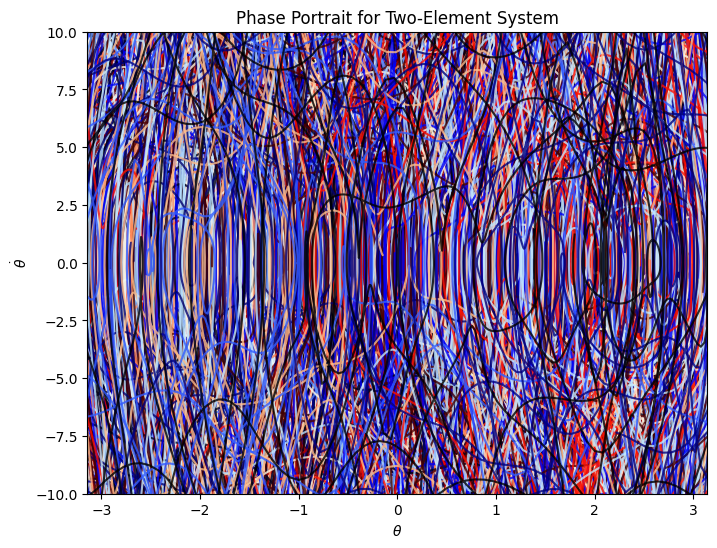

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equations for theta1'' and theta2''
def nldpf_eq(y, t, b, g, k1, k2, alpha1, alpha2, f, omega):
    theta1, theta1_dot, theta2, theta2_dot = y

    # Equation for theta1''
    theta1_double_dot = (1 / (1 - (4/5) * np.cos(theta2 - theta1)**2))*\
                     (
                            (4/5) * (theta1_dot**2) * np.sin(theta2 - theta1) * np.cos(theta2 - theta1) - (4/5) * g * np.sin(theta2) * np.cos(theta2 - theta1) + (8/5) * k2 * (theta2 - theta1) * np.cos(theta2 - theta1) * (1 + alpha2 * (theta2 - theta1)**2) + \
                            (4/5) * b * theta1_dot * np.cos(theta2 - theta1)**2 - (4/5) * f * np.cos(omega * t) * np.cos(theta2 - theta1) + (2/5) * (theta2_dot**2) * np.sin(theta2 - theta1) +
                            (6/5) * g * np.sin(theta1) - (4/5) * k1 * theta1*(1+alpha1*theta1**2)+ (4/5)*k2* (theta2-theta1)*(1+alpha2*(theta2-theta1)**2)-b*theta1_dot+(2/5)*f*np.cos(omega*t)
                        )

    #Equation for theta2''
    theta2_double_dot = (1 / (1 - (4/5) * np.cos(theta2 - theta1)**2)) * \
                        (
                            (-4/5) * (theta2_dot**2) * np.sin(theta2 - theta1) * np.cos(theta2 - theta1) - (12/5) * g * np.sin(theta1) * np.cos(theta2 - theta1) +
                            (8/5) * k1 * theta1 * np.cos(theta2 - theta1) * (1 + alpha1 * (theta1)**2) -(8/5) * k2 * (theta2 - theta1) * np.cos(theta2 - theta1) * (1 + alpha2 * (theta2 - theta1)**2) +
                            (4/5) * b * theta2_dot * np.cos(theta2 - theta1)**2 - (4/5) * f * np.cos(omega * t) * np.cos(theta2 - theta1) -(2) * (theta1_dot**2) * np.sin(theta2 - theta1) + (2) * g * np.sin(theta2) - (4) * k2 * (theta2 - theta1)*(1+alpha2*(theta2-theta1)**2) -b*theta2_dot + (2)*f*np.cos(omega*t)
                        )

    return [theta1_dot, theta1_double_dot, theta2_dot, theta2_double_dot]

# Parameters
b = 0.5 # Modified value
g = 9.8  # Gravitational acceleration
k1 = 5.0  # Modified value
k2 = 0.8  # Modified value
alpha1 = 0.1  # Modified value
alpha2 = 1 # Modified value
f = 10 # Modified value
omega = 6 # No external force


# Range of initial angles for theta1 and theta2
theta1_range = np.linspace(-np.pi, np.pi, 10)  # Range of initial angles for theta1
theta2_range = np.linspace(-np.pi, np.pi, 10)  # Range of initial angles for theta2

# Range of initial angular velocities for theta1_dot and theta2_dot
theta1_dot_0 = 3 # Initial angular velocity for theta1_dot
theta2_dot_0 = -3  # Initial angular velocity for theta2_dot

# Time points for integration
t = np.linspace(0, 10, 1000)  # Time points from 0 to 20 with 1000 intervals

# Plot the phase portrait for each combination of initial conditions
plt.figure(figsize=(8, 6))
color_map = plt.cm.flag(np.linspace(0, 1, len(theta1_range) * len(theta2_range)))

idx = 0
for theta1_0 in theta1_range:
    for theta2_0 in theta2_range:
        y0 = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]
        solution = odeint(nldpf_eq, y0, t, args=(b, g, k1, k2, alpha1, alpha2, f, omega))
        theta1, theta1_dot, theta2, theta2_dot = solution.T
        plt.plot(theta1, theta1_dot, color=color_map[idx], alpha=0.8)
        plt.plot(theta2, theta2_dot, color=color_map[idx], alpha=0.8)
        idx += 1

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.title('Phase Portrait for Two-Element System')
plt.grid(True)
plt.xlim(-np.pi, np.pi)  # Set x-axis limits
plt.ylim(-10 ,10)  # Set y-axis limits
plt.show()

*The above code iterates over all combinations of initial angles for θ1 and θ2 within specified ranges and plots the corresponding trajectories.This may lead to overlapping trajectories and might not provide a clear representation of the phase space.*

**TWO ELEMENT SYSTEM CODE DIFFERENT WAY TO PLOT**

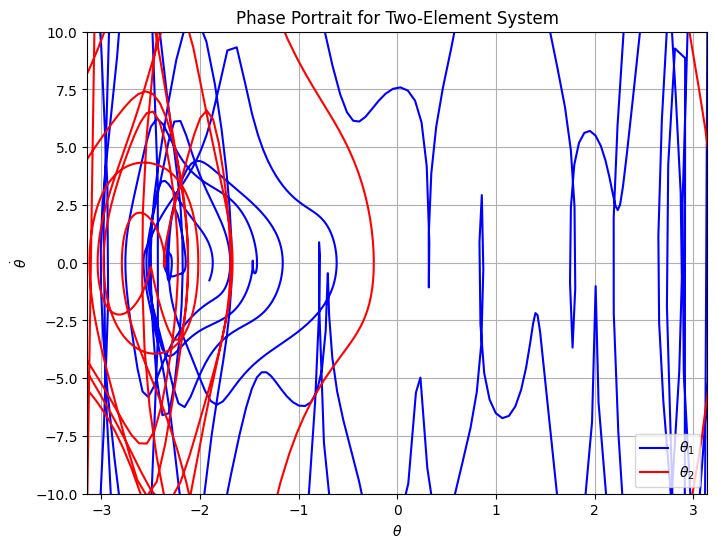

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equations for theta1'' and theta2''
def nldpf_eq(y, t, b, g, k1, k2, alpha1, alpha2, f, omega):
    theta1, theta1_dot, theta2, theta2_dot = y

    # Equation for theta1''
    theta1_double_dot = (1 / (1 - (4/5) * np.cos(theta2 - theta1)**2))*\
                     (
                            (4/5) * (theta1_dot**2) * np.sin(theta2 - theta1) * np.cos(theta2 - theta1) - (4/5) * g * np.sin(theta2) * np.cos(theta2 - theta1) + (8/5) * k2 * (theta2 - theta1) * np.cos(theta2 - theta1) * (1 + alpha2 * (theta2 - theta1)**2) + \
                            (4/5) * b * theta1_dot * np.cos(theta2 - theta1)**2 - (4/5) * f * np.cos(omega * t) * np.cos(theta2 - theta1) + (2/5) * (theta2_dot**2) * np.sin(theta2 - theta1) +
                            (6/5) * g * np.sin(theta1) - (4/5) * k1 * theta1*(1+alpha1*theta1**2)+ (4/5)*k2* (theta2-theta1)*(1+alpha2*(theta2-theta1)**2)-b*theta1_dot+(2/5)*f*np.cos(omega*t)
                        )

    #Equation for theta2''
    theta2_double_dot = (1 / (1 - (4/5) * np.cos(theta2 - theta1)**2)) * \
                        (
                            (-4/5) * (theta2_dot**2) * np.sin(theta2 - theta1) * np.cos(theta2 - theta1) - (12/5) * g * np.sin(theta1) * np.cos(theta2 - theta1) +
                            (8/5) * k1 * theta1 * np.cos(theta2 - theta1) * (1 + alpha1 * (theta1)**2) -(8/5) * k2 * (theta2 - theta1) * np.cos(theta2 - theta1) * (1 + alpha2 * (theta2 - theta1)**2) +
                            (4/5) * b * theta2_dot * np.cos(theta2 - theta1)**2 - (4/5) * f * np.cos(omega * t) * np.cos(theta2 - theta1) -(2) * (theta1_dot**2) * np.sin(theta2 - theta1) + (2) * g * np.sin(theta2) - (4) * k2 * (theta2 - theta1)*(1+alpha2*(theta2-theta1)**2) -b*theta2_dot + (2)*f*np.cos(omega*t)
                        )

    return [theta1_dot, theta1_double_dot, theta2_dot, theta2_double_dot]

# Parameters
b = 0.5 # Modified value
g = 9.8  # Gravitational acceleration
k1 = 5  # Modified value
k2 = 0.8  # Modified value
alpha1 =0.1  # Modified value
alpha2 = 1 # Modified value
f = 10 # Modified value
omega = 6  # external force

# Range of initial angles for theta1 and theta2
theta1_range = np.linspace(-np.pi, np.pi, 10)  # Range of initial angles for theta1
theta2_range = np.linspace(-np.pi, np.pi, 10)  # Range of initial angles for theta2

# Range of initial angular velocities for theta1_dot and theta2_dot
theta1_dot_0 = 10 # Initial angular velocity for theta1_dot
theta2_dot_0 = -10  # Initial angular velocity for theta2_dot

# Time points for integration
t = np.linspace(0, 10, 1000)  # Time points from 0 to 20 with 1000 intervals

# Initialize y0 with the initial conditions
y0 = [np.pi, theta1_dot_0, -np.pi, theta2_dot_0]

# Solve the differential equation
solution = odeint(nldpf_eq, y0, t, args=(b, g, k1, k2, alpha1, alpha2, f, omega))
theta1, theta1_dot, theta2, theta2_dot = solution.T

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.plot(theta1, theta1_dot, label=r'$\theta_1$', color='b')
plt.plot(theta2, theta2_dot, label=r'$\theta_2$', color='r')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.title('Phase Portrait for Two-Element System')
plt.legend()
plt.grid(True)
plt.xlim(-np.pi, np.pi)  # Set x-axis limits
plt.ylim(-10, 10)  # Set y-axis limits
plt.show()

*This code visualizes the phase portrait of the system but in a more organized manner. It defines specific initial conditions for θ1 and θ2 (within the specified ranges and then iterates over these initial conditions to compute the trajectories of the system. Each trajectory is plotted separately,
so that they are not overlapped and providing a clearer representation of the phase space.*
